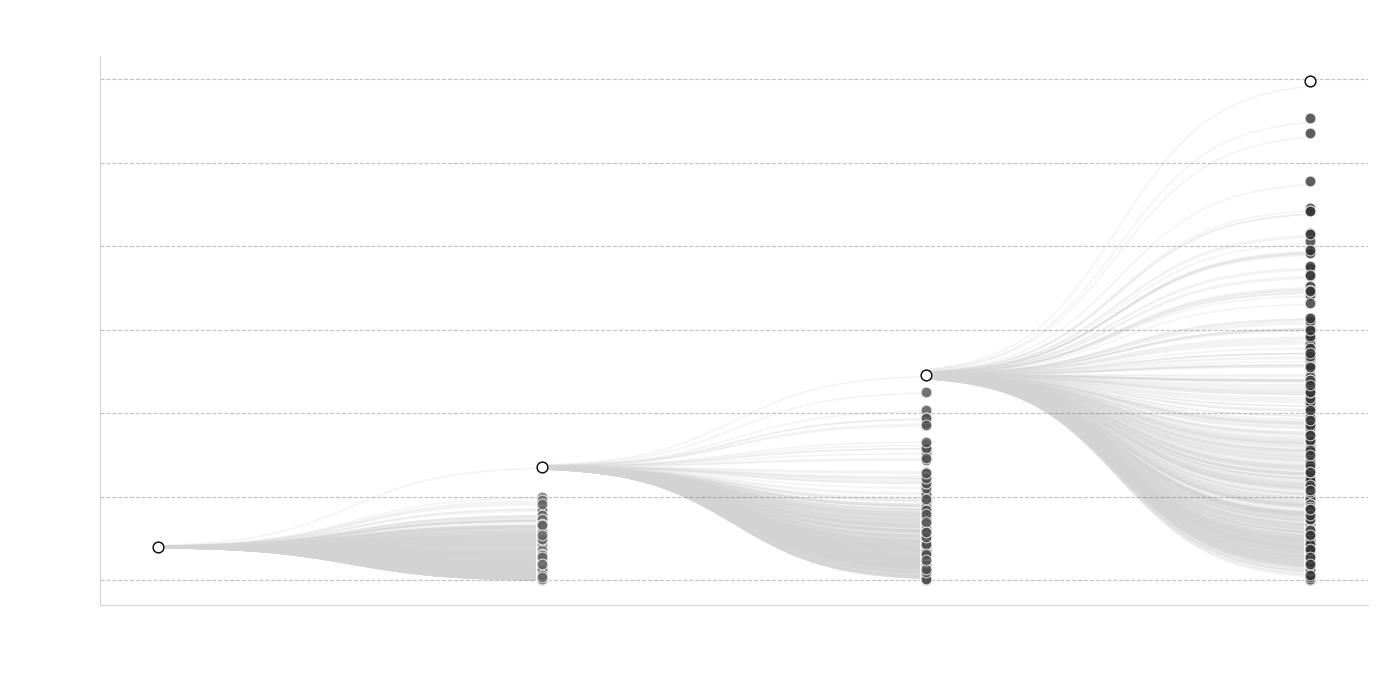

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import expit
import matplotlib as mpl

# Constants
FITNESS_WEIGHTS = (1.0, 0.2)  # (surface_area, trapped_water_vol)
PRIMORDIAL_TRAPPED_WATER = 0
PRIMORDIAL_SURFACE_AREA = 4

# Load and prepare data
df = pd.read_csv("INDIVIDUALS_EVOLVING_OPEN_EYED_3/all_individuals_evaluation_log.csv")

df['fitness'] = (
    FITNESS_WEIGHTS[0] * df['surface_area'] +
    FITNESS_WEIGHTS[1] * df['trapped_water_vol']
)

# Add primordial generation
primordial = pd.DataFrame([{
    'generation': -1,
    'individual_id': 'primordial',
    'trapped_water_vol': PRIMORDIAL_TRAPPED_WATER,
    'surface_area': PRIMORDIAL_SURFACE_AREA,
    'fitness': FITNESS_WEIGHTS[0] * PRIMORDIAL_SURFACE_AREA +
               FITNESS_WEIGHTS[1] * PRIMORDIAL_TRAPPED_WATER
}])

df = pd.concat([primordial, df[['generation', 'individual_id', 'trapped_water_vol', 'surface_area', 'fitness']]])

# Set style
plt.style.use("default")
mpl.rcParams.update({
    'font.size': 14,
    'font.family': 'DejaVu Sans',
    'axes.facecolor': 'none',         # Transparent background for axes
    'figure.facecolor': 'none',       # Transparent background for figure
    'axes.edgecolor': '#cccccc',
    'xtick.color': 'white',
    'ytick.color': 'white',
    'axes.labelcolor': 'white',
    'text.color': 'white',
    'axes.titlecolor': 'white',
    'grid.color': '#666666',
})

fig, ax = plt.subplots(figsize=(14, 7), facecolor='none')

generations = sorted(df['generation'].unique())

# Plot individuals
colors = [plt.cm.Greys(0.6 + 0.3 * i / len(generations)) for i in range(len(generations))]
for i, g in enumerate(generations):
    gen_data = df[df['generation'] == g]
    ax.scatter(
        [g] * len(gen_data),
        gen_data['fitness'],
        color=colors[i],
        s=60,
        alpha=0.8,
        edgecolors='white',
        linewidths=0.7,
        zorder=3
    )

# Connect generations with sigmoidal curves
for i in range(len(generations) - 1):
    gen_parent = generations[i]
    gen_child = generations[i + 1]

    parent_data = df[df['generation'] == gen_parent]
    child_data = df[df['generation'] == gen_child]

    # Best parent by fitness
    best_parent = parent_data.loc[parent_data['fitness'].idxmax()]
    x_vals = np.linspace(gen_parent, gen_child, 100)

    for _, child in child_data.iterrows():
        y_start = best_parent['fitness']
        y_end = child['fitness']
        y_vals = y_start + (y_end - y_start) * expit(8 * (x_vals - gen_parent - 0.5))
        ax.plot(x_vals, y_vals, color='lightgray', alpha=0.25, linewidth=1.2, zorder=1)

# Highlight best individuals with "glow"
for g in generations:
    gen_data = df[df['generation'] == g]
    best = gen_data.loc[gen_data['fitness'].idxmax()]
    for size, alpha in [(200, 0.05), (100, 0.1), (60, 0.3)]:
        ax.scatter(g, best['fitness'], s=size, color='white', alpha=alpha, zorder=4)
    ax.scatter(g, best['fitness'], s=60, edgecolors='black', facecolor='white', zorder=5)

# Aesthetics
ax.set_xticks(generations)
ax.set_xlabel("Generation", labelpad=10)
ax.set_ylabel("Fitness\n(surface_area × 1.0 + trapped_water_vol × 0.2)", labelpad=10)
ax.set_title("Evolution of Fitness Across Generations", fontsize=18, pad=20)
ax.grid(True, which='both', axis='y', linestyle='--', alpha=0.4)

# Adjust spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('lightgray')
ax.spines['bottom'].set_color('lightgray')

plt.tight_layout()

# SAVE with transparent background
plt.savefig("evolution_fitness_transparent.png", dpi=300, transparent=True)
plt.show()
